# ML Benchmark
**Authors** 
Christopher Metzler, Shehani, Deverell, Malachi Buchheit, Bailey Trip

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("exploratory.csv", na_values = "?", sep=',', skipinitialspace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19055 entries, 0 to 19054
Data columns (total 62 columns):
 #   Column                                                                          Non-Null Count  Dtype 
---  ------                                                                          --------------  ----- 
 0   Agency Name                                                                     19055 non-null  object
 1   State Name [District] Latest available year                                     19049 non-null  object
 2   Agency Type [District] 2017-18                                                  19051 non-null  object
 3   Agency Type [District] 2016-17                                                  19051 non-null  object
 4   Agency Type [District] 2015-16                                                  19051 non-null  object
 5   School District Level Code (SCHLEV) [District Finance] 2017-18                  19051 non-null  object
 6   School District Level 

In [3]:
#Check for NA values
print(df.isna().sum())
#drop existing NA values
df.fillna(value=0,inplace=True)

Agency Name                                                                0
State Name [District] Latest available year                                6
Agency Type [District] 2017-18                                             4
Agency Type [District] 2016-17                                             4
Agency Type [District] 2015-16                                             4
                                                                          ..
Local Rev. - Property Taxes (T06) [District Finance] 2016-17               4
Local Rev. - Property Taxes (T06) [District Finance] 2015-16               4
Federal Rev. - Federal Title I Revenue (C14) [District Finance] 2017-18    4
Federal Rev. - Federal Title I Revenue (C14) [District Finance] 2016-17    4
Federal Rev. - Federal Title I Revenue (C14) [District Finance] 2015-16    4
Length: 62, dtype: int64


In [4]:
#Verify Results
print(df.isna().sum())

Agency Name                                                                0
State Name [District] Latest available year                                0
Agency Type [District] 2017-18                                             0
Agency Type [District] 2016-17                                             0
Agency Type [District] 2015-16                                             0
                                                                          ..
Local Rev. - Property Taxes (T06) [District Finance] 2016-17               0
Local Rev. - Property Taxes (T06) [District Finance] 2015-16               0
Federal Rev. - Federal Title I Revenue (C14) [District Finance] 2017-18    0
Federal Rev. - Federal Title I Revenue (C14) [District Finance] 2016-17    0
Federal Rev. - Federal Title I Revenue (C14) [District Finance] 2015-16    0
Length: 62, dtype: int64


In [5]:
#Split the data into years 2015-16, 2016-17 and 2017-18
years_15_16 = df[['Agency Name', 'State Name [District] Latest available year', 'Agency Type [District] 2015-16', 'School District Level Code (SCHLEV) [District Finance] 2015-16', 'Urban-centric Locale [District] 2015-16','Total Students All Grades (Includes AE) [District] 2015-16','American Indian/Alaska Native Students [District] 2015-16', 'Hispanic Students [District] 2015-16','Asian or Asian/Pacific Islander Students [District] 2015-16','Black or African American Students [District] 2015-16','White Students [District] 2015-16','Two or More Races Students [District] 2015-16','Nat. Hawaiian or Other Pacific Isl. Students [District] 2015-16','Total Race/Ethnicity [District] 2015-16','Pupil/Teacher Ratio [District] 2015-16','Total Staff [District] 2015-16','Total General Revenue (TOTALREV) [District Finance] 2015-16','Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2015-16','Long Term Debt - Outstanding Beginning of FY (_19H) [District Finance] 2015-16','State Rev. - General Formula Assistance (C01) [District Finance] 2015-16','Local Rev. - Property Taxes (T06) [District Finance] 2015-16','Federal Rev. - Federal Title I Revenue (C14) [District Finance] 2015-16']].copy()
#years_15_16.info()

years_16_17 = df[['Agency Name', 'State Name [District] Latest available year', 'Agency Type [District] 2016-17', 'School District Level Code (SCHLEV) [District Finance] 2016-17', 'Urban-centric Locale [District] 2016-17','Total Students All Grades (Includes AE) [District] 2016-17','American Indian/Alaska Native Students [District] 2016-17', 'Hispanic Students [District] 2016-17','Asian or Asian/Pacific Islander Students [District] 2016-17','Black or African American Students [District] 2016-17','White Students [District] 2016-17','Two or More Races Students [District] 2016-17','Nat. Hawaiian or Other Pacific Isl. Students [District] 2016-17','Total Race/Ethnicity [District] 2016-17','Pupil/Teacher Ratio [District] 2016-17','Total Staff [District] 2016-17','Total General Revenue (TOTALREV) [District Finance] 2016-17','Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2016-17','Long Term Debt - Outstanding Beginning of FY (_19H) [District Finance] 2016-17','State Rev. - General Formula Assistance (C01) [District Finance] 2016-17','Local Rev. - Property Taxes (T06) [District Finance] 2016-17','Federal Rev. - Federal Title I Revenue (C14) [District Finance] 2016-17']].copy()
#years_16_17.info()

years_17_18 = df[['Agency Name', 'State Name [District] Latest available year', 'Agency Type [District] 2017-18', 'School District Level Code (SCHLEV) [District Finance] 2017-18', 'Urban-centric Locale [District] 2017-18','Total Students All Grades (Includes AE) [District] 2017-18','American Indian/Alaska Native Students [District] 2017-18', 'Hispanic Students [District] 2017-18','Asian or Asian/Pacific Islander Students [District] 2017-18','Black or African American Students [District] 2017-18','White Students [District] 2017-18','Two or More Races Students [District] 2017-18','Nat. Hawaiian or Other Pacific Isl. Students [District] 2017-18','Total Race/Ethnicity [District] 2017-18','Pupil/Teacher Ratio [District] 2017-18','Total Staff [District] 2017-18','Total General Revenue (TOTALREV) [District Finance] 2017-18','Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2017-18','Long Term Debt - Outstanding Beginning of FY (_19H) [District Finance] 2017-18','State Rev. - General Formula Assistance (C01) [District Finance] 2017-18','Local Rev. - Property Taxes (T06) [District Finance] 2017-18','Federal Rev. - Federal Title I Revenue (C14) [District Finance] 2017-18']].copy()
years_17_18.describe()

,Agency Name,State Name [District] Latest available year,Agency Type [District] 2017-18,School District Level Code (SCHLEV) [District Finance] 2017-18,Urban-centric Locale [District] 2017-18,Total Students All Grades (Includes AE) [District] 2017-18,American Indian/Alaska Native Students [District] 2017-18,Hispanic Students [District] 2017-18,Asian or Asian/Pacific Islander Students [District] 2017-18,Black or African American Students [District] 2017-18,White Students [District] 2017-18,Two or More Races Students [District] 2017-18,Nat. Hawaiian or Other Pacific Isl. Students [District] 2017-18,Total Race/Ethnicity [District] 2017-18,Pupil/Teacher Ratio [District] 2017-18,Total Staff [District] 2017-18,Total General Revenue (TOTALREV) [District Finance] 2017-18,Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2017-18,Long Term Debt - Outstanding Beginning of FY (_19H) [District Finance] 2017-18,State Rev. - General Formula Assistance (C01) [District Finance] 2017-18,Local Rev. - Property Taxes (T06) [District Finance] 2017-18,Federal Rev. - Federal Title I Revenue (C14) [District Finance] 2017-18
count,19055,19055,19055,19055,19055,19055,19055,19055,19055,19055,19055,19055,19055,19055,19055,19055,19055,19055,19055,19055,19055,19055
unique,18511,97,11,8,14,5525,547,2526,1195,1979,4248,1088,260,5514,2350,12674,13958,10566,8456,10155,8571,2696
top,DEPARTMENT OF CORRECTIONS,Texas,1-Regular local school district that is NOT a ...,"=""03-Elementary/secondary school system""",21-Suburb: Large,†,"=""0""",†,"=""0""","=""0""",†,†,"=""0""","=""0""",†,–,†,†,"=""0""",†,†,"=""0"""
freq,6,1243,13147,11393,3416,1561,3017,1561,2814,1743,1561,1561,5397,1619,2763,1185,1510,2587,5620,1510,6517,2483


- Created labels for each year's real value columns
- Converted string data to 0.

In [6]:
#Set real labels
realcol_2015_16 = ['Total Students All Grades (Includes AE) [District] 2015-16','American Indian/Alaska Native Students [District] 2015-16', 'Hispanic Students [District] 2015-16','Asian or Asian/Pacific Islander Students [District] 2015-16','Black or African American Students [District] 2015-16','White Students [District] 2015-16','Two or More Races Students [District] 2015-16','Nat. Hawaiian or Other Pacific Isl. Students [District] 2015-16','Total Race/Ethnicity [District] 2015-16','Pupil/Teacher Ratio [District] 2015-16','Total Staff [District] 2015-16','Total General Revenue (TOTALREV) [District Finance] 2015-16','Long Term Debt - Outstanding Beginning of FY (_19H) [District Finance] 2015-16','State Rev. - General Formula Assistance (C01) [District Finance] 2015-16','Local Rev. - Property Taxes (T06) [District Finance] 2015-16','Federal Rev. - Federal Title I Revenue (C14) [District Finance] 2015-16']
realcol_2016_17 = ['Total Students All Grades (Includes AE) [District] 2016-17','American Indian/Alaska Native Students [District] 2016-17', 'Hispanic Students [District] 2016-17','Asian or Asian/Pacific Islander Students [District] 2016-17','Black or African American Students [District] 2016-17','White Students [District] 2016-17','Two or More Races Students [District] 2016-17','Nat. Hawaiian or Other Pacific Isl. Students [District] 2016-17','Total Race/Ethnicity [District] 2016-17','Pupil/Teacher Ratio [District] 2016-17','Total Staff [District] 2016-17','Total General Revenue (TOTALREV) [District Finance] 2016-17','Long Term Debt - Outstanding Beginning of FY (_19H) [District Finance] 2016-17','State Rev. - General Formula Assistance (C01) [District Finance] 2016-17','Local Rev. - Property Taxes (T06) [District Finance] 2016-17','Federal Rev. - Federal Title I Revenue (C14) [District Finance] 2016-17']
realcol_2017_18 = ['Total Students All Grades (Includes AE) [District] 2017-18','American Indian/Alaska Native Students [District] 2017-18', 'Hispanic Students [District] 2017-18','Asian or Asian/Pacific Islander Students [District] 2017-18','Black or African American Students [District] 2017-18','White Students [District] 2017-18','Two or More Races Students [District] 2017-18','Nat. Hawaiian or Other Pacific Isl. Students [District] 2017-18','Total Race/Ethnicity [District] 2017-18','Pupil/Teacher Ratio [District] 2017-18','Total Staff [District] 2017-18','Total General Revenue (TOTALREV) [District Finance] 2017-18','Long Term Debt - Outstanding Beginning of FY (_19H) [District Finance] 2017-18','State Rev. - General Formula Assistance (C01) [District Finance] 2017-18','Local Rev. - Property Taxes (T06) [District Finance] 2017-18','Federal Rev. - Federal Title I Revenue (C14) [District Finance] 2017-18']

#Continue cleaning data to account for uninterpretable strings
years_15_16[realcol_2015_16] = years_15_16[realcol_2015_16].apply(pd.to_numeric, errors='coerce') #Converts uninterpretable data into NaN's
#years_15_16.fillna(years_15_16[realcol_2015_16].mean(), inplace=True) #Convert NaN's into  mean
years_15_16.fillna(0, inplace=True) #Convert NaN's into interpretable data
#print(years_15_16.head(25))

years_16_17[realcol_2016_17] = years_16_17[realcol_2016_17].apply(pd.to_numeric, errors='coerce') #Converts uninterpretable data into NaN's
#years_16_17.fillna(years_16_17[realcol_2016_17].mean(), inplace=True) #Convert NaN's into  mean
years_16_17.fillna(0, inplace=True) #Convert NaN's into interpretable data
#print(years_16_17.head(5))

years_17_18[realcol_2017_18] = years_17_18[realcol_2017_18].apply(pd.to_numeric, errors='coerce') #Converts uninterpretable data into NaN's
#years_17_18.fillna(years_17_18[realcol_2017_18].mean(), inplace=True) #Convert NaN's into  mean
years_17_18.fillna(0, inplace=True) #Convert NaN's into interpretable data
#print(years_17_18.head(5))

- "Describe what you did to create the poverty labels"

In [7]:
years_15_16['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2015-16'] = years_15_16['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2015-16'].apply(pd.to_numeric, errors='coerce') #Converts uninterpretable data into NaN's
years_15_16.fillna(0, inplace=True) #Convert NaN's into interpretable data
years_15_16['cStrict Poverty'] = years_15_16['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2015-16'] < 10000
years_15_16['bHigh Poverty'] = years_15_16['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2015-16'] < 15000
years_15_16['aNo Poverty'] = years_15_16['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2015-16'] > 15000
years_15_16['bHigh Poverty'].where(years_15_16['cStrict Poverty'] == False, other=False, inplace=True)
years_15_16['bHigh Poverty'].fillna(value=False, inplace=True)
years_15_16['Poverty Level'] = years_15_16.loc[:,['cStrict Poverty', 'bHigh Poverty', 'aNo Poverty']].eq(True).idxmax(axis=1).astype('category').cat.codes

years_16_17['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2016-17'] = years_16_17['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2016-17'].apply(pd.to_numeric, errors='coerce') #Converts uninterpretable data into NaN's
years_16_17.fillna(0, inplace=True) #Convert NaN's into interpretable data
years_16_17['cStrict Poverty'] = years_16_17['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2016-17'] < 10000
years_16_17['bHigh Poverty'] = years_16_17['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2016-17'] < 15000
years_16_17['aNo Poverty'] = years_16_17['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2016-17'] > 15000
years_16_17['bHigh Poverty'].where(years_16_17['cStrict Poverty'] == False, other=False, inplace=True)
years_16_17['bHigh Poverty'].fillna(value=False, inplace=True)
years_16_17['Poverty Level'] = years_16_17.loc[:,['cStrict Poverty', 'bHigh Poverty', 'aNo Poverty']].eq(True).idxmax(axis=1).astype('category').cat.codes

years_17_18['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2017-18'] = years_17_18['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2017-18'].apply(pd.to_numeric, errors='coerce') #Converts uninterpretable data into NaN's
years_17_18.fillna(0, inplace=True) #Convert NaN's into interpretable data
years_17_18['cStrict Poverty'] = years_17_18['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2017-18'] < 10000
years_17_18['bHigh Poverty'] = years_17_18['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2017-18'] < 15000
years_17_18['aNo Poverty'] = years_17_18['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2017-18'] > 15000
years_17_18['bHigh Poverty'].where(years_17_18['cStrict Poverty'] == False, other=False, inplace=True)
years_17_18['bHigh Poverty'].fillna(value=False, inplace=True)
years_17_18['Poverty Level'] = years_17_18.loc[:,['cStrict Poverty', 'bHigh Poverty', 'aNo Poverty']].eq(True).idxmax(axis=1).astype('category').cat.codes

#Remove labels used
years_15_16.drop(labels=['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2015-16','cStrict Poverty','bHigh Poverty','aNo Poverty'], axis=1, inplace=True)
years_16_17.drop(labels=['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2016-17','cStrict Poverty','bHigh Poverty','aNo Poverty'], axis=1, inplace=True)
years_17_18.drop(labels=['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2017-18','cStrict Poverty','bHigh Poverty','aNo Poverty'], axis=1, inplace=True)

new_years_15_16 = years_15_16[['School District Level Code (SCHLEV) [District Finance] 2015-16', 'Urban-centric Locale [District] 2015-16','Total Students All Grades (Includes AE) [District] 2015-16','American Indian/Alaska Native Students [District] 2015-16', 'Hispanic Students [District] 2015-16','Asian or Asian/Pacific Islander Students [District] 2015-16','Black or African American Students [District] 2015-16','White Students [District] 2015-16','Two or More Races Students [District] 2015-16','Nat. Hawaiian or Other Pacific Isl. Students [District] 2015-16','Poverty Level']].copy()
print(new_years_15_16.describe())

       Total Students All Grades (Includes AE) [District] 2015-16  ...  Poverty Level
count                                       19055.000000           ...   19055.000000
mean                                         2640.407557           ...       1.024088
std                                         10440.310226           ...       0.771526
min                                             0.000000           ...       0.000000
25%                                           177.000000           ...       0.000000
50%                                           626.000000           ...       1.000000
75%                                          1974.000000           ...       2.000000
max                                        639337.000000           ...       2.000000

[8 rows x 9 columns]


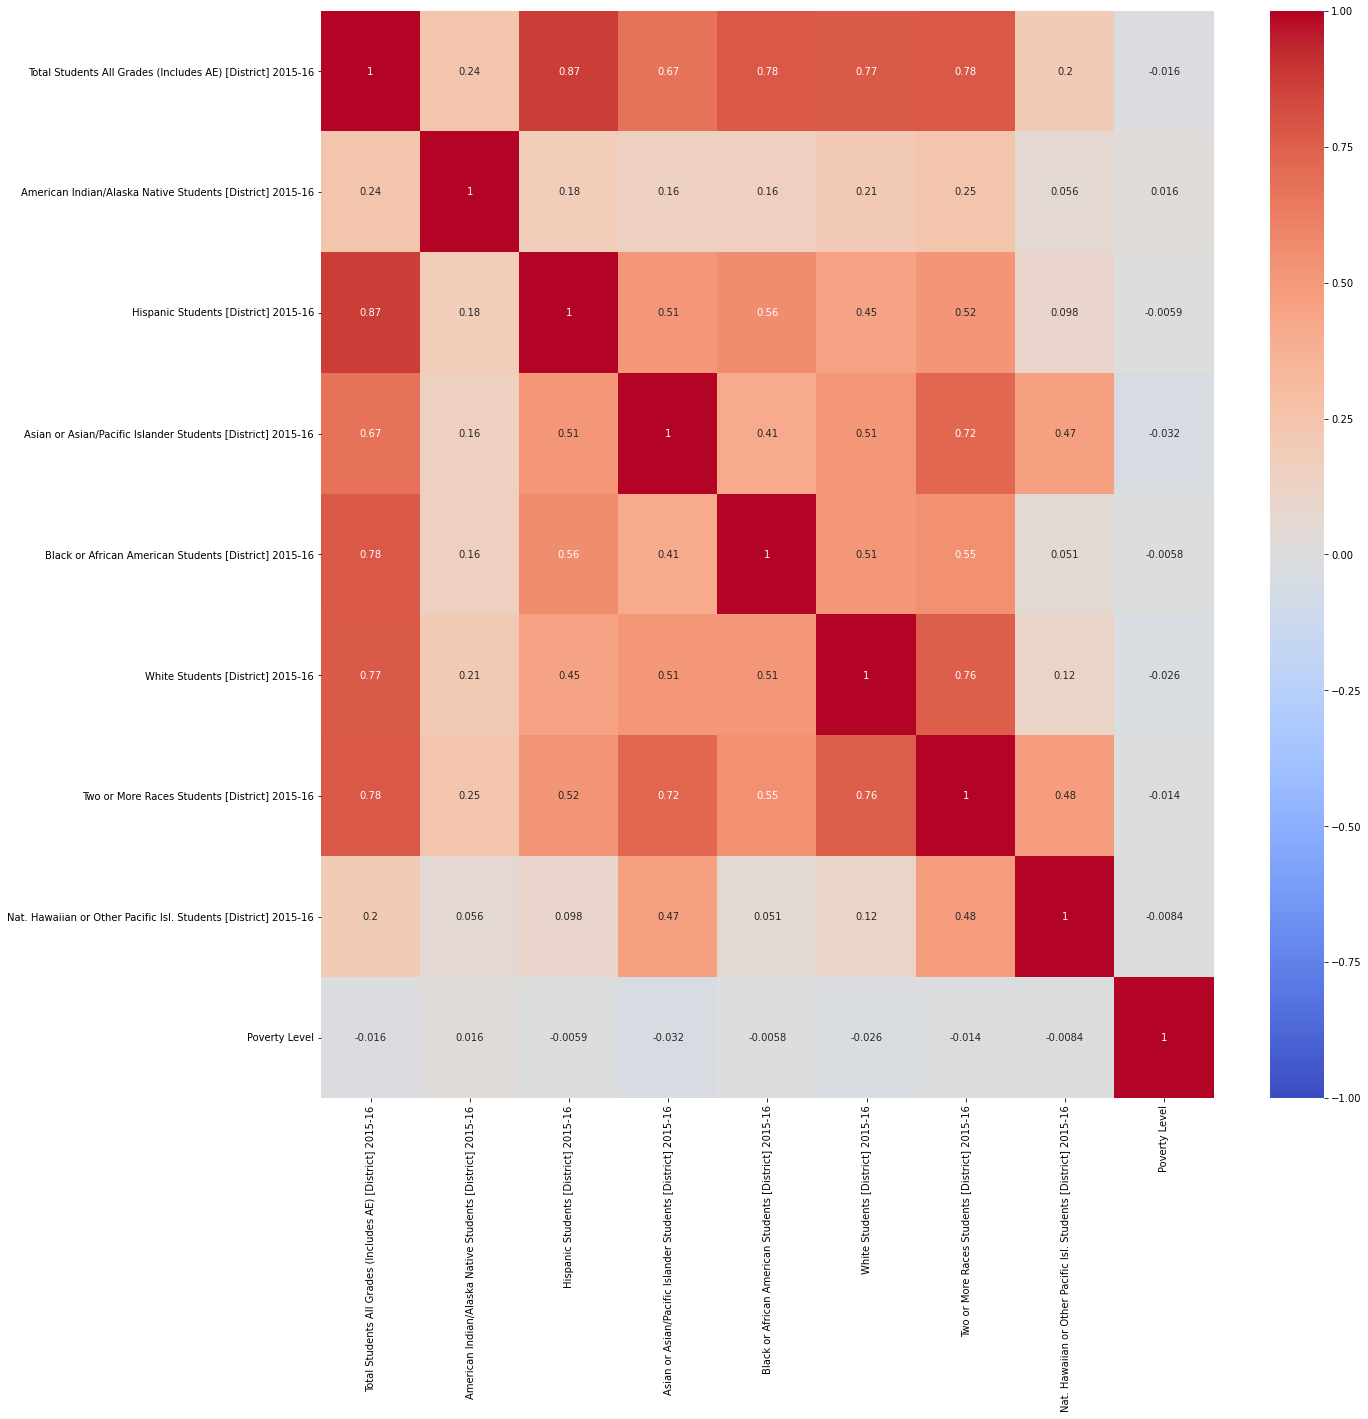

In [8]:
plt.figure(figsize=(20,20))
#sns.pairplot(years_15_16)
sns.heatmap(new_years_15_16.corr(),annot=True,cmap='coolwarm',vmin=-1)
#sns.heatmap(years_16_17.corr(),annot=True,cmap='coolwarm',vmin=-1)
#sns.heatmap(years_17_18.corr(),annot=True,cmap='coolwarm',vmin=-1)

- Set catagorical columns into dummy variables.

In [9]:
col_2015_16 = ["Agency Type [District] 2015-16", "School District Level Code (SCHLEV) [District Finance] 2015-16", "Urban-centric Locale [District] 2015-16"]
col_2016_17 = ["Agency Type [District] 2016-17", "School District Level Code (SCHLEV) [District Finance] 2016-17", "Urban-centric Locale [District] 2016-17"]
col_2017_18 = ["Agency Type [District] 2017-18", "School District Level Code (SCHLEV) [District Finance] 2017-18", "Urban-centric Locale [District] 2017-18"]

years_15_16 = pd.get_dummies(years_15_16, columns=col_2015_16)
years_16_17 = pd.get_dummies(years_16_17, columns=col_2016_17)
years_17_18 = pd.get_dummies(years_17_18, columns=col_2017_18)

#Delete if we dont need below

#years_15_16.join(pd.get_dummies(years_15_16['Urban-centric Locale [District] 2015-16']))
#years_15_16.drop('Urban-centric Locale [District] 2015-16', inplace=True, axis=1)

#years_16_17.join(pd.get_dummies(years_16_17['Urban-centric Locale [District] 2016-17']))
#years_16_17.drop('Urban-centric Locale [District] 2016-17', inplace=True, axis=1)

#years_17_18.join(pd.get_dummies(years_17_18['Urban-centric Locale [District] 2017-18']))
#years_17_18.drop('Urban-centric Locale [District] 2017-18', inplace=True, axis=1)


- After analyzing the heatmap it was observed that the Pupil/Teacher ratio column is in most negative correlation while the American Indian/Alaskan native students column is in most postive correlation with the poverty column.

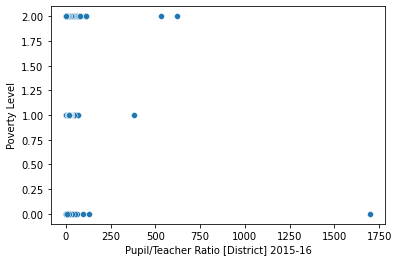

In [10]:
sns.scatterplot(data=years_15_16, x="Pupil/Teacher Ratio [District] 2015-16", y="Poverty Level")

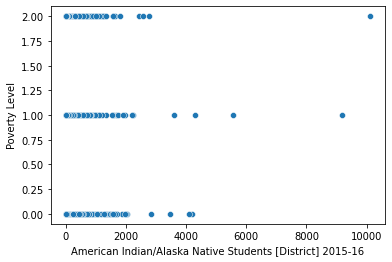

In [11]:
sns.scatterplot(data=years_15_16, x="American Indian/Alaska Native Students [District] 2015-16", y="Poverty Level")

- "Describe what you guys did for feature selection"

In [12]:
col_remove = ['Agency Name', 'State Name [District] Latest available year']

col_remove_2017_18 = ['American Indian/Alaska Native Students [District] 2017-18','Nat. Hawaiian or Other Pacific Isl. Students [District] 2017-18','Total General Revenue (TOTALREV) [District Finance] 2017-18','Long Term Debt - Outstanding Beginning of FY (_19H) [District Finance] 2017-18','State Rev. - General Formula Assistance (C01) [District Finance] 2017-18']
years_17_18.drop(columns=col_remove+col_remove_2017_18, inplace=True)

col_remove_2016_17 = []
for col in col_remove_2017_18:
    col_remove_2016_17.append(col[:-7]+"2016-17")
years_16_17.drop(columns=col_remove+col_remove_2016_17, inplace=True)

col_remove_2015_16 = []
for col in col_remove_2017_18:
    col_remove_2015_16.append(col[:-7]+"2015-16")
years_15_16.drop(columns=col_remove+col_remove_2015_16, inplace=True)

In [13]:
# Assign values to y
lab_col = ['Poverty Level']

y = years_15_16[lab_col].values
# Drop column from data frame

years_15_16.drop(columns=lab_col, inplace=True)

# Assign predictor values to x
x = years_15_16.values

print(years_15_16.columns) #for feature names in decision tree

print(x.shape, y.shape)

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state=1)

Index(['Total Students All Grades (Includes AE) [District] 2015-16',
       'Hispanic Students [District] 2015-16',
       'Asian or Asian/Pacific Islander Students [District] 2015-16',
       'Black or African American Students [District] 2015-16',
       'White Students [District] 2015-16',
       'Two or More Races Students [District] 2015-16',
       'Total Race/Ethnicity [District] 2015-16',
       'Pupil/Teacher Ratio [District] 2015-16',
       'Total Staff [District] 2015-16',
       'Local Rev. - Property Taxes (T06) [District Finance] 2015-16',
       'Federal Rev. - Federal Title I Revenue (C14) [District Finance] 2015-16',
       'Agency Type [District] 2015-16_0',
       'Agency Type [District] 2015-16_1-Regular local school district that is NOT a component of a supervisory union',
       'Agency Type [District] 2015-16_2-Local school district that is a component of a supervisory union',
       'Agency Type [District] 2015-16_3-Supervisory union administrative center (or c

- Here we created normalized copies of our train data

In [14]:
x_train_normalized = preprocessing.normalize(xtrain)
x_test_normalized = preprocessing.normalize(xtest)

- Followed by standardized copies of our train/test data

In [15]:
std_scale = preprocessing.StandardScaler().fit(xtrain)
x_train_std = std_scale.transform(xtrain)
x_test_std  = std_scale.transform(xtest)
#y_train_std = std_scale.transform(ytrain)

Linear Regression ** I think we should focus on decision tree classification

In [16]:
reg = linear_model.LinearRegression()
reg.fit(xtrain,ytrain)
reg.score(xtest,ytest)

# Calculate the score on train and test sets
# Your code goes below
reg.score(xtrain,ytrain), reg.score(xtest,ytest)

(0.40681321269717874, 0.3813846156573968)

Decision Tree

In [17]:
dtc = tree.DecisionTreeClassifier(max_depth=10)
dtc.fit(xtrain, ytrain)
#dtc.fit(x_train_std, ytrain)

fig = plt.figure(figsize=(10,10))
#tree.plot_tree(dtc, feature_names = years_15_16.columns, filled=True)

fig.savefig("decision_tree.pdf")

dtc_pred = dtc.score(xtrain, ytrain), dtc.score(xtest,ytest)
print(dtc_pred)

(0.8098268171083705, 0.7488848071372344)


<Figure size 720x720 with 0 Axes>

In [18]:
pipe_steps = [('scaler', StandardScaler()),('decsT', DecisionTreeClassifier())]

check_params = {'decsT__criterion':['gini','entropy'],
                'decsT__max_depth':np.arange(5,15)}

pline = Pipeline(pipe_steps)
print(pline)

Pipeline(steps=[('scaler', StandardScaler()),
                ('decsT', DecisionTreeClassifier())])


In [19]:
from tqdm import tqdm_notebook as tqdm
import warnings
from sklearn.model_selection import GridSearchCV

warnings.filterwarnings("ignore")

for cv in tqdm(range(3,6)):
  create_grid = GridSearchCV(pline, param_grid=check_params, cv=cv)
  create_grid.fit(xtrain,ytrain)
  print('score for %d fold CV:= %3.2f' %(cv, create_grid.score(xtest,ytest)))
  print('Best fit parameters from GridSearchCV: ')
  print(create_grid.best_params_)

  0%|          | 0/3 [00:00<?, ?it/s]

score for 3 fold CV:= 0.75
Best fit parameters from GridSearchCV: 
{'decsT__criterion': 'gini', 'decsT__max_depth': 10}
score for 4 fold CV:= 0.75
Best fit parameters from GridSearchCV: 
{'decsT__criterion': 'entropy', 'decsT__max_depth': 10}
score for 5 fold CV:= 0.74
Best fit parameters from GridSearchCV: 
{'decsT__criterion': 'gini', 'decsT__max_depth': 11}
